# Methods 2024
## Stats II: Linear regressions and correlations

Tuesday, 9/24/24

# Imports

In [35]:
######################## new stuff ########################

from sklearn import linear_model
# We'll be using the sklearn.linear_model module today, which carries the frequentist
# linear models we need!

## Frequentist models interpret probability as the long-run frequency of an event occurring based solely on observed data from repeated experiments.

from scipy import stats
# scipy.stats has methods for drawing distributions
# AND now, also correlation coefficients

from io import StringIO
# Allows us to pass literal strings as files to pandas (specifically a json file)

######################## packages/modules we know ########################

import numpy as np
# numpy is our main "mathematics" engine and rng

import pandas as pd
# pandas is our dataframe package

from matplotlib import pyplot as plt
import seaborn as sns
# matplotlib.pyplot is our main plotting engine, while seaborn is built upon matplotlib
# and has a lot of specific functionality

%config InlineBackend.figure_format='retina'
%matplotlib inline

# Linear Regressions

## How to run a linear regression

Let's create some data by sampling from distributions and then run some linear models.



Let's generate two vectors of the following random variables:

$x \sim \mathcal{N}(0,1)$

$y \sim \mathcal{N}(0,1)$


In [36]:
# Initialize a random number generator with a specific seed (11206) for reproducibility
rng = np.random.default_rng(11206)

# Generate an array 'x' of 100 random values from a normal distribution with mean 0 and standard deviation 1
x = rng.normal(0, 1, size=100)

# Generate another array 'y' of 100 random values from a normal distribution with mean 0 and standard deviation 1
y = rng.normal(0, 1, size=100)

We have two random variables that follow the standard normal. Are they going to be correlated?

In [37]:
# Create a linear regression model and fit it to the data (x and y)
# x is reshaped to be a 2D array as required by scikit-learn for features (reshape(-1, 1))
reg = linear_model.LinearRegression().fit(x.reshape(-1, 1), y)

# Print the coefficient (slope) of the fitted linear regression model
print(reg.coef_)

# Print the intercept (y-intercept) of the fitted linear regression model
print(reg.intercept_)

[0.09505077]
0.04666156148410919


Let's visualize.

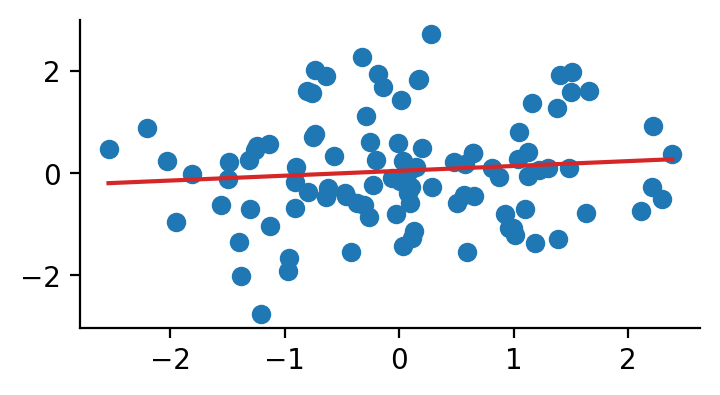

In [38]:
# Generate 100 evenly spaced points between the min and max of x for plotting the regression line
x_range = np.linspace(min(x), max(x), 100)

# Calculate the predicted y values using the linear regression equation (y = mx + b)
y_pred = x_range * reg.coef_ + reg.intercept_

# Create a figure and axis for plotting, set figure size to 4x2
fig, ax = plt.subplots(figsize=(4, 2))

# Plot the original data points as a scatter plot
ax.scatter(x, y)

# Plot the regression line on the same axes, using the red color for the line
ax.plot(x_range, y_pred, color='tab:red')

# Remove the top and right spines of the plot for a cleaner appearance
sns.despine()

You can also use the built-in method "predict" to generate y_pred.

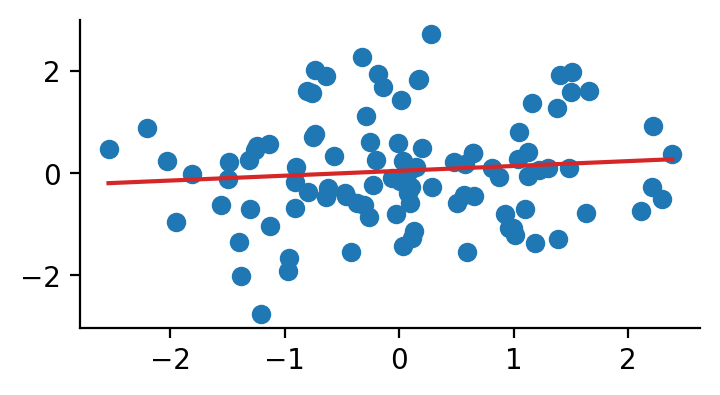

In [39]:
# Create 100 evenly spaced values between the minimum and maximum values of x
x_range = np.linspace(min(x), max(x), 100)

# Use the trained regression model 'reg' to predict y values for the x_range
y_pred = reg.predict(x_range.reshape(-1, 1))

# Create a new figure and axes for plotting with a size of 4x2 inches
fig, ax = plt.subplots(figsize=(4, 2))

# Plot the original data points as a scatter plot
ax.scatter(x, y)

# Plot the predicted regression line in red on the same plot
ax.plot(x_range, y_pred, color='tab:red')

# Remove the top and right borders from the plot for a cleaner look
sns.despine()

## Investigating linear regression behavior

Linear regressions are fickle. Don't trust them blindly. Let's see what happens when we start adding zeros into our predictor variable.

Let's generate two vectors of the following random variables:

$x \sim \text{HalfNorm}(0,1)$

$y \sim \text{Exp}(1)$

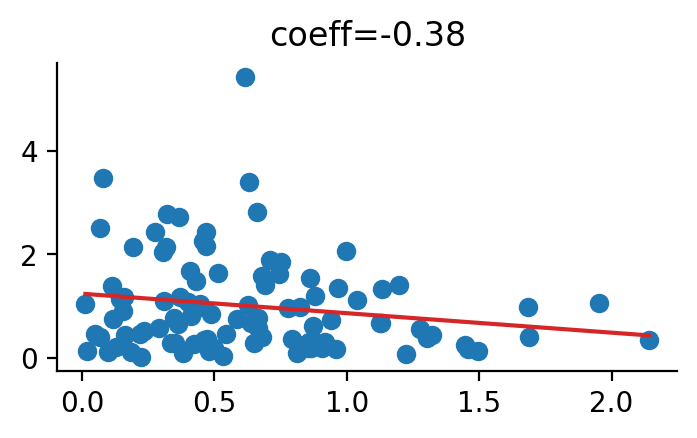

In [40]:
# Set up a random number generator (RNG) with a seed value of 42 for reproducibility
rng = np.random.default_rng(42)

# Generate 100 normally distributed random numbers with mean 0 and standard deviation 1
# Take the absolute value to ensure all x values are non-negative
x = np.abs(rng.normal(0, 1, size=100))

# Generate 100 random numbers from an exponential distribution with a scale (mean) of 1
y = rng.exponential(1, size=100)

# Fit a linear regression model to the data, reshaping x to be 2D (as required by scikit-learn)
reg = linear_model.LinearRegression().fit(x.reshape(-1, 1), y)

#############################################

# Create 100 evenly spaced values between the minimum and maximum values of x
x_range = np.linspace(min(x), max(x), 100)

# Use the fitted linear regression model to predict y values for the x_range
y_pred = reg.predict(x_range.reshape(-1, 1))

#############################################

# Create a new figure and axes for plotting with a size of 4x2 inches
fig, ax = plt.subplots(figsize=(4, 2))

# Plot the original data points (x, y) as a scatter plot
ax.scatter(x, y)

# Plot the predicted regression line (x_range, y_pred) in red
ax.plot(x_range, y_pred, color='tab:red')

# Set the title of the plot, displaying the coefficient of the regression line
ax.set_title(f"coeff={reg.coef_[0]:.2f}")

# Remove the top and right borders from the plot for a cleaner visual style
sns.despine()


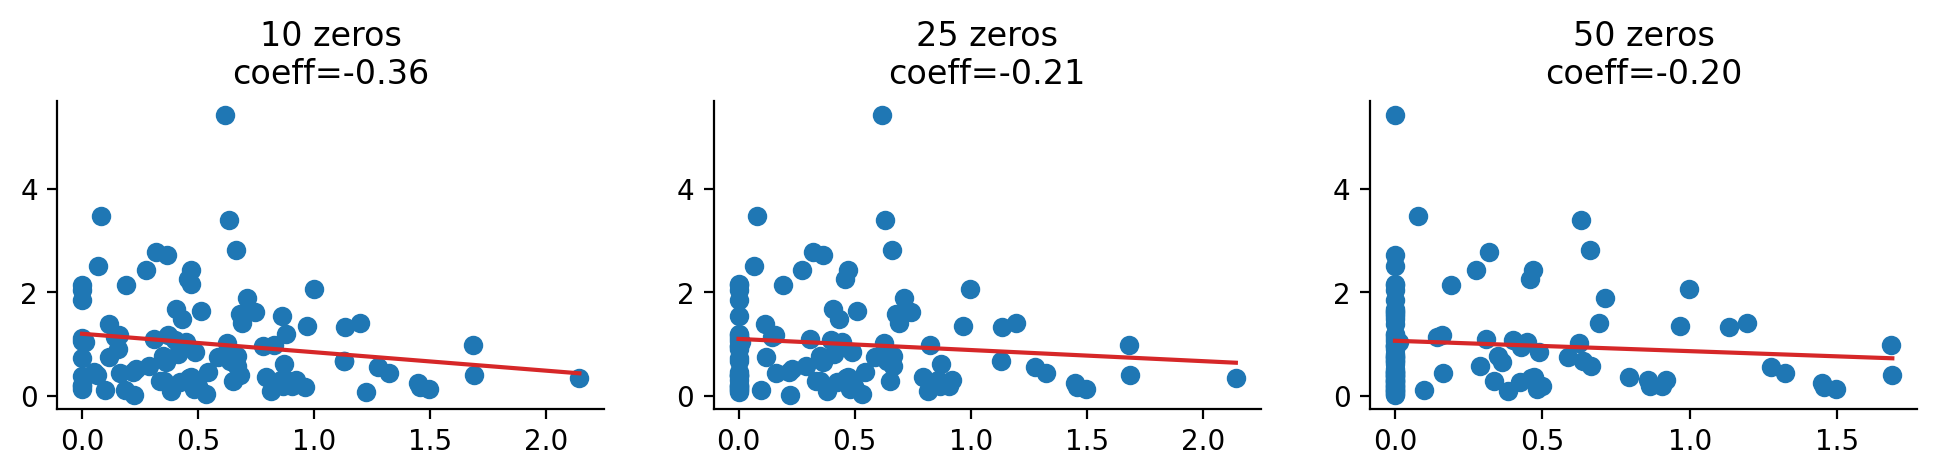

In [41]:
# This code creates a series of scatter plots with linear regression lines, where different amounts of the x values are set to zero.
# It visualizes how introducing varying numbers of zeros in the x data affects the regression model and the slope (coefficient).

n_zeros = [10, 25, 50]

fig, axes = plt.subplots(ncols=3, figsize=(12, 2))
axes = axes.reshape(-1)

for ax, n_zero in zip(axes, n_zeros):

    cur_x = np.copy(x)
    cur_x[:n_zero] = 0

    reg = linear_model.LinearRegression().fit(cur_x.reshape(-1, 1), y)

    x_range = np.linspace(min(cur_x), max(cur_x), 100)
    y_pred = reg.predict(x_range.reshape(-1, 1))

    ax.scatter(cur_x, y)
    ax.plot(x_range, y_pred, color='tab:red')

    ax.set_title(f'{n_zero} zeros\ncoeff={reg.coef_[0]:.2f}')

sns.despine()

What do we do with the zeros?

* Remove them ... maybe
* Incorporate them into a different kind of statistical model ... yes (but outside the scope of this class)
    * Look up "zero-inflated" models if you're interested


Why am I covering this? This happens all the time in biology, and it's important to see how zeros can affect the data.

Let's see what happens if we just "throw out" the zero data:

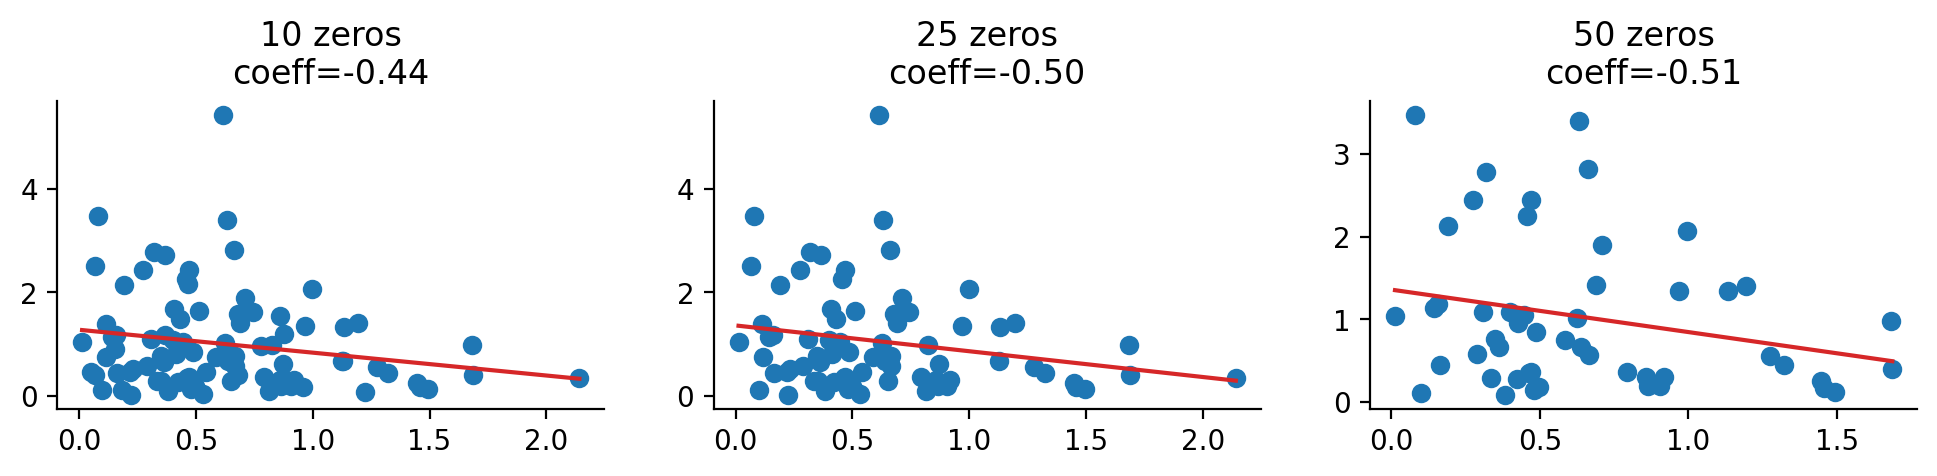

In [42]:
n_zeros = [10, 25, 50]

fig, axes = plt.subplots(ncols=3, figsize=(12, 2))
axes = axes.reshape(-1)

for ax, n_zero in zip(axes, n_zeros):

    cur_x = np.copy(x)
    cur_x = cur_x[n_zero:] # Get from index n_zero to the end

    cur_y = np.copy(y)
    cur_y = cur_y[n_zero:] # Get from index n_zero to the end

    reg = linear_model.LinearRegression().fit(cur_x.reshape(-1, 1), cur_y)

    x_range = np.linspace(min(cur_x), max(cur_x), 100)
    y_pred = reg.predict(x_range.reshape(-1, 1))

    ax.scatter(cur_x, cur_y)
    ax.plot(x_range, y_pred, color='tab:red')

    ax.set_title(f'{n_zero} zeros\ncoeff={reg.coef_[0]:.2f}')

sns.despine()

So, we throw out the data and we've recovered a positive linear relationship.

That means that we "won", right?

No.

Remember, the **original data we started with had no reasonable correlation.**

This is a *spurious correlation*. The less data we have, the more likely it is that our linear regression will report a correlation when there isn't one.

Let's see what we do if we just sample 5, 10, 50, 100, and 1000 random points and then run a linear regression. Try changing the seed and notice which plots are subject to the most change!

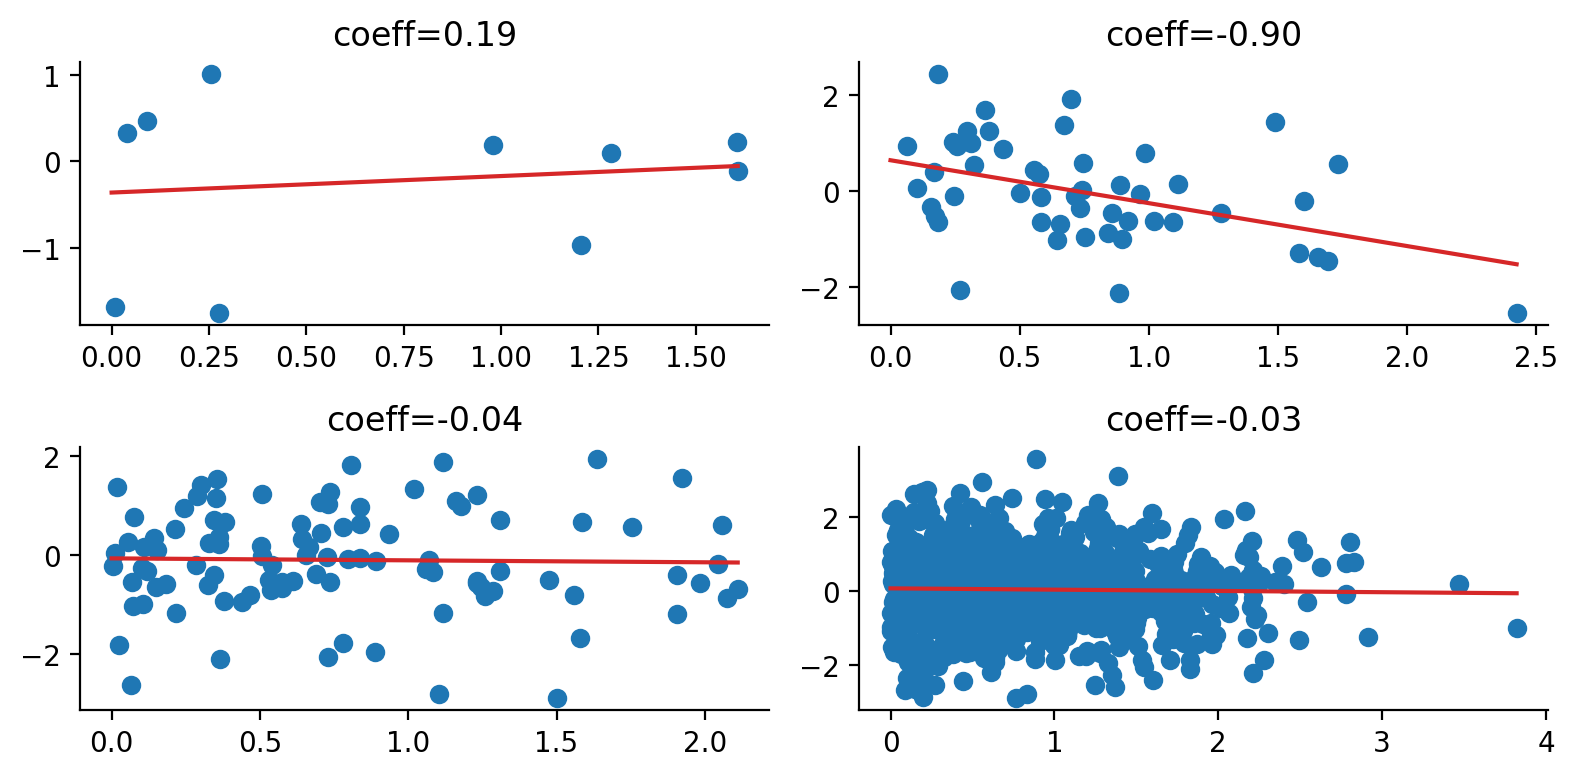

In [43]:
rng = np.random.default_rng(777777)
n_points = [10, 50, 100, 1000]

fig, axes = plt.subplots(figsize=(8, 4), ncols=2, nrows=2)
axes = axes.reshape(-1)

for ax, n_point in zip(axes, n_points):

    x = np.abs(rng.normal(0, 1, size=n_point))
    y = rng.normal(0, 1, size=n_point)

    ################################################

    reg = linear_model.LinearRegression().fit(x.reshape(-1, 1), y)

    ################################################

    x_range = np.linspace(0, max(x), 100)
    y_pred = x_range * reg.coef_ + reg.intercept_

    ax.scatter(x, y)
    ax.plot(x_range, y_pred, color='tab:red')

    ax.set_title(f'coeff={reg.coef_[0]:.2f}')

sns.despine()
plt.tight_layout()


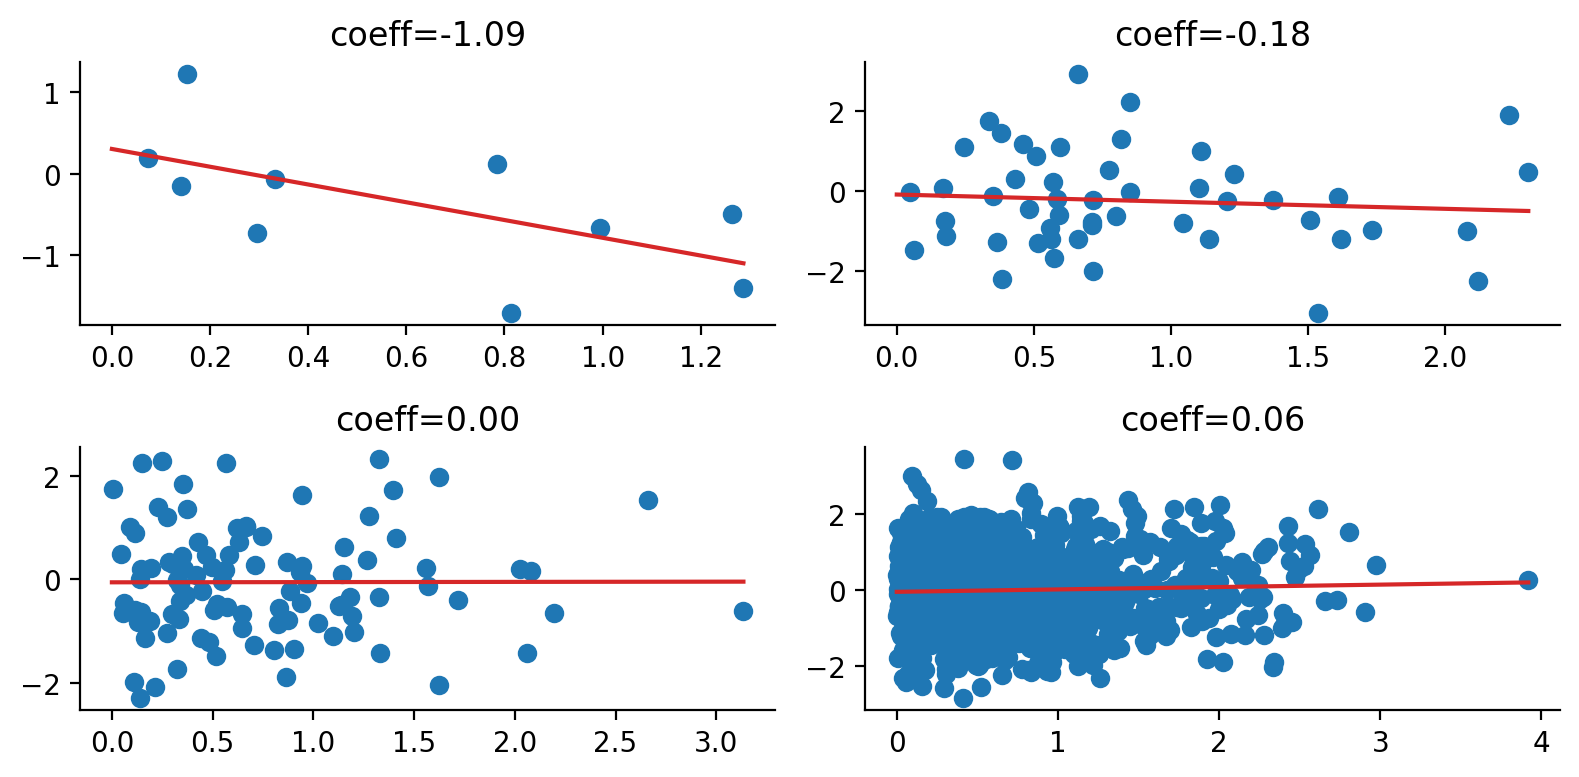

In [44]:
rng = np.random.default_rng(888888) # different seed
n_points = [10, 50, 100, 1000]

fig, axes = plt.subplots(figsize=(8, 4), ncols=2, nrows=2)
axes = axes.reshape(-1)

for ax, n_point in zip(axes, n_points):

    x = np.abs(rng.normal(0, 1, size=n_point))
    y = rng.normal(0, 1, size=n_point)

    ################################################

    reg = linear_model.LinearRegression().fit(x.reshape(-1, 1), y)

    ################################################

    x_range = np.linspace(0, max(x), 100)
    y_pred = x_range * reg.coef_ + reg.intercept_

    ax.scatter(x, y)
    ax.plot(x_range, y_pred, color='tab:red')

    ax.set_title(f'coeff={reg.coef_[0]:.2f}')

sns.despine()
plt.tight_layout()


## Moral of the story

* All of the data here we've generated is random, yet has revealed both strong, weak, and no correlation.
    * Imagine this is data you generated after a long experiment. You're quite inclined to believe that your large coefficient value may be real.


**What's the solution?**
* More data. As you can see from above, having more random points means that the noise starts to cancel each other out and the correlation becomes nearly nonexistant.


* Repetition. For biological assays, we shouldn't get the same random signal every time.

* Mechanistic understanding. If we know how the data is generated, we can have better confidence if our model is learning real information or not.



# Multiple regression

To run non-regularized linear regression, just add more predictors.

* We will have two predictors, $x_{1}$ and $x_{2}$, and one variable to be predicted, $y$.

$x_{1} \sim \mathcal{N}(0,1)$

$x_{2} \sim \mathcal{N}(0,1)$

$y = x_{1} + \text{exp}(1)$

* Notice $y$ ***equals*** a mathematical expression that includes a random pull from an exponential distribution. We'll see this a lot in the Bayesian lectures, and is a way to model noise.

* We will create a matrix $X$ that has two columns, one for each predictor $x_{1}$ and $x_{2}$.


In [45]:
rng = np.random.default_rng(11206)

# Generate a 100x2 matrix X with samples from a standard normal distribution (mean=0, std=1)
X = rng.normal(0, 1, size=(100, 2))

# Generate target variable y as the sum of the first column of X and random values
# drawn from an exponential distribution (scale=1, size=100)
y = X[:, 0] + rng.exponential(1, size=100)

reg = linear_model.LinearRegression().fit(X, y)

print("Coefficients:", reg.coef_) #coefficients
print("Intercept:", reg.intercept_) #intercept

Coefficients: [1.05396777 0.04453913]
Intercept: 1.0984012034743855


Let's visualize. First, the bad way, by using 3D plots.

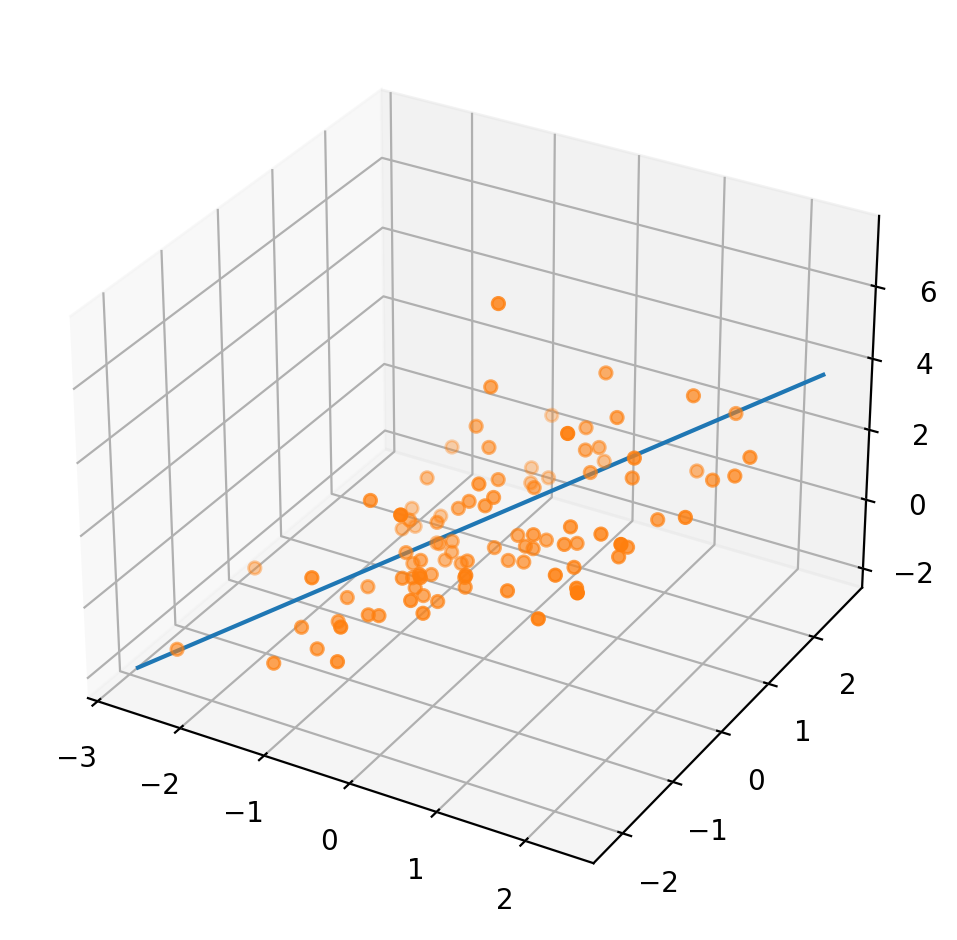

In [46]:
x1_min, x2_min = X.min(axis=0)
x1_max, x2_max = X.max(axis=0)

x1_range = np.linspace(x1_min, x1_max, 100)
x2_range = np.linspace(x2_min, x2_max, 100)

y_pred = (
    x1_range * reg.coef_[0] + x2_range * reg.coef_[1] + reg.intercept_
)

########################

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(x1_range, x2_range, y_pred)
ax.scatter3D(X[:, 0], X[:, 1], y, color='tab:orange')

# ax.view_init(elev=25, azim=30)

plt.tight_layout()

We need to make a 2D plot and *freeze* the second variable.

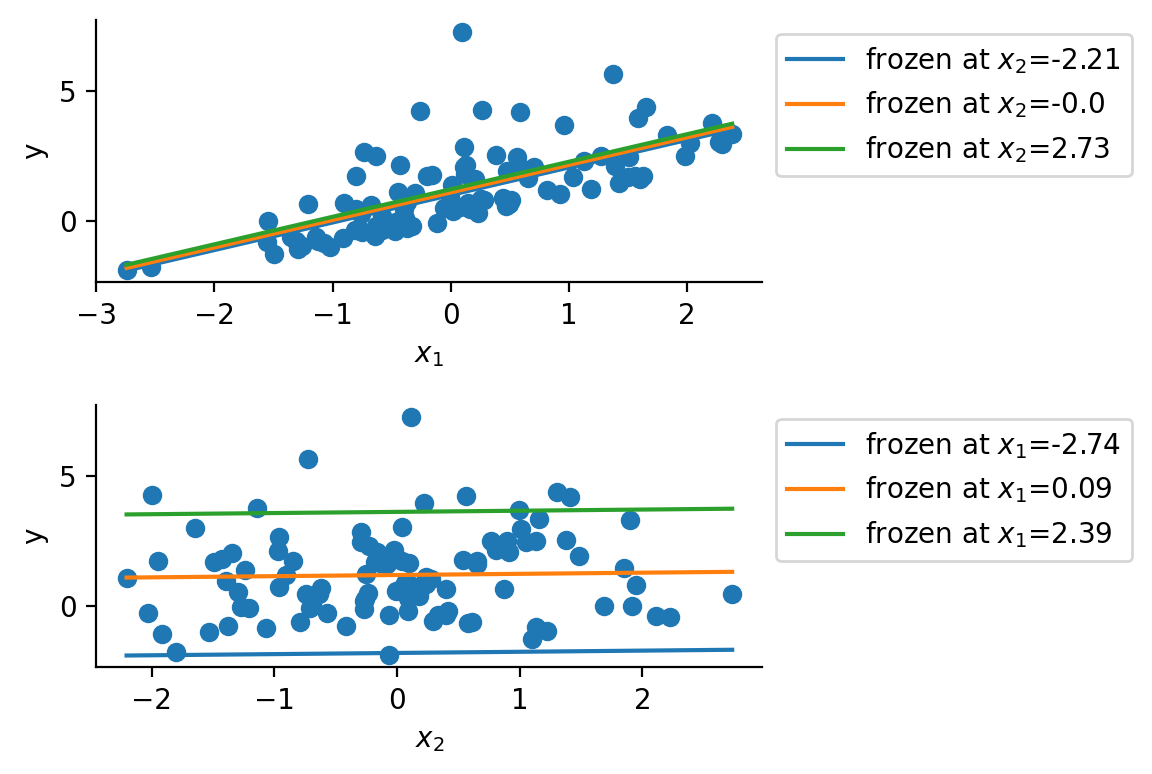

In [47]:
fig, axes = plt.subplots(figsize=(6,4), nrows=2)
axes=axes.reshape(-1)

x1_min, x2_min = X.min(axis=0)
x1_max, x2_max = X.max(axis=0)

x1_range = np.linspace(x1_min, x1_max, 100)
x2_range = np.linspace(x2_min, x2_max, 100)

###########  Plot graph 1  ###################

ax = axes[0]

y_pred_by_x1_1 = x1_range * reg.coef_[0] + x2_min * reg.coef_[1] + reg.intercept_
y_pred_by_x1_2 = x1_range * reg.coef_[0] + X[:, 1].mean() * reg.coef_[1] + reg.intercept_
y_pred_by_x1_3 = x1_range * reg.coef_[0] + x2_max * reg.coef_[1] + reg.intercept_

ax.scatter(X[:, 0], y)


ax.plot(
    x1_range,
    y_pred_by_x1_1,
    label=f"frozen at $x_{2}$={np.around(x2_min, decimals=2)}",
)

ax.plot(
    x1_range,
    y_pred_by_x1_2,
    label=f"frozen at $x_{2}$={np.around(X[:, 1].mean(), decimals=2)}",
)

ax.plot(
    x1_range,
    y_pred_by_x1_3,
    label=f"frozen at $x_{2}$={np.around(x2_max, decimals=2)}",
)


ax.set_xlabel("$x_{1}$")
ax.set_ylabel("y")

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

###########  Plot graph 1  ###################

ax = axes[1]

y_pred_by_x2_1 = x2_range * reg.coef_[1] + x1_min * reg.coef_[0] + reg.intercept_
y_pred_by_x2_2 = x2_range * reg.coef_[1] + X[:, 0].mean() * reg.coef_[0] + reg.intercept_
y_pred_by_x2_3 = x2_range * reg.coef_[1] + x1_max * reg.coef_[0] + reg.intercept_

ax.scatter(X[:, 1], y)


ax.plot(
    x2_range,
    y_pred_by_x2_1,
    label=f"frozen at $x_{1}$={np.around(x1_min, decimals=2)}",
)

ax.plot(
    x2_range,
    y_pred_by_x2_2,
    label=f"frozen at $x_{1}$={np.around(X[:, 0].mean(), decimals=2)}",
)

ax.plot(
    x2_range,
    y_pred_by_x2_3,
    label=f"frozen at $x_{1}$={np.around(x1_max, decimals=2)}",
)


ax.set_xlabel("$x_{2}$")
ax.set_ylabel("y")

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

################################################################

sns.despine()
plt.tight_layout()


The second plot shows that changes in $x_{2}$ do not correlate with changes in $\text{y}$ at those specific levels of $x_{2}$.

This is the case when one predictor does not matter whatsoever. Remember, we calculated $\text{y}$ by:

$y = x_{1} + \text{exp}(1)$

Thus, we defined $\text{y}$ to be dependent on $x_{1}$ and independent of $x_{2}$.

---

Let's look at a second example, where our two predictors both influence $y$.

$x_{1} \sim \mathcal{N}(0,1)$

$x_{2} \sim \mathcal{N}(0,1)$

$y = x_{1} + x_{2} + \text{exp}(1)$


In [48]:
rng = np.random.default_rng(53217)

X = rng.normal(0, 1, size=(100, 2))
y = X[:, 0] + X[:, 1] + rng.exponential(1, size=100)

reg = linear_model.LinearRegression().fit(X, y)

print(reg.coef_)
print(reg.intercept_)

[1.03250923 0.96551686]
1.1111034761064364


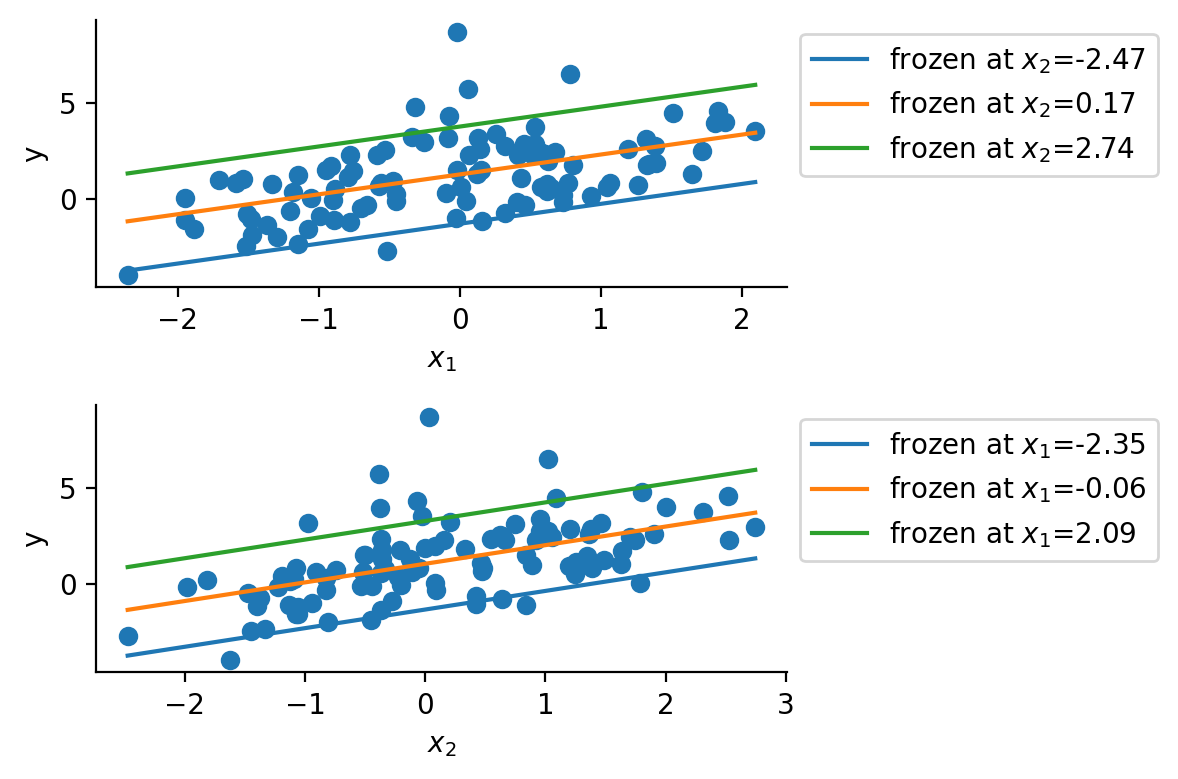

In [49]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2)
axes = axes.reshape(-1)

x1_min, x2_min = X.min(axis=0)
x1_max, x2_max = X.max(axis=0)

x1_range = np.linspace(x1_min, x1_max, 100)
x2_range = np.linspace(x2_min, x2_max, 100)

###########  Plot graph 1  ###################

ax = axes[0]

y_pred_by_x1_1 = x1_range * reg.coef_[0] + x2_min * reg.coef_[1] + reg.intercept_
y_pred_by_x1_2 = x1_range * reg.coef_[0] + X[:, 1].mean() * reg.coef_[1] + reg.intercept_
y_pred_by_x1_3 = x1_range * reg.coef_[0] + x2_max * reg.coef_[1] + reg.intercept_

ax.scatter(X[:, 0], y)


ax.plot(
    x1_range,
    y_pred_by_x1_1,
    label=f"frozen at $x_{2}$={np.around(x2_min, decimals=2)}",
)

ax.plot(
    x1_range,
    y_pred_by_x1_2,
    label=f"frozen at $x_{2}$={np.around(X[:, 1].mean(), decimals=2)}",
)

ax.plot(
    x1_range,
    y_pred_by_x1_3,
    label=f"frozen at $x_{2}$={np.around(x2_max, decimals=2)}",
)


ax.set_xlabel("$x_{1}$")
ax.set_ylabel("y")

ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

###########  Plot graph 1  ###################

ax = axes[1]

y_pred_by_x2_1 = x2_range * reg.coef_[1] + x1_min * reg.coef_[0] + reg.intercept_
y_pred_by_x2_2 = x2_range * reg.coef_[1] + X[:, 0].mean() * reg.coef_[0] + reg.intercept_
y_pred_by_x2_3 = x2_range * reg.coef_[1] + x1_max * reg.coef_[0] + reg.intercept_

ax.scatter(X[:, 1], y)


ax.plot(
    x2_range,
    y_pred_by_x2_1,
    label=f"frozen at $x_{1}$={np.around(x1_min, decimals=2)}",
)

ax.plot(
    x2_range,
    y_pred_by_x2_2,
    label=f"frozen at $x_{1}$={np.around(X[:, 0].mean(), decimals=2)}",
)

ax.plot(
    x2_range,
    y_pred_by_x2_3,
    label=f"frozen at $x_{1}$={np.around(x1_max, decimals=2)}",
)


ax.set_xlabel("$x_{2}$")
ax.set_ylabel("y")

ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

################################################################

sns.despine()
plt.tight_layout()


In this case, both predictors matter.

---

## Regularized Regressions

* Ridge regression: Penalize magnitudes (L2 penalty)
* Lasso regression: Penalize number of coefficients (L1 penalty)
* ElasticNet regression: Penalizes both (both L1 and L2 penalties)


***Regularized Regression Code***

```python

reg = linear_model.ElasticNet(alpha=1, l1_ratio=0.5).fit(x, y)

reg = linear_model.Ridge(alpha=1).fit(x, y)

reg = linear_model.Lasso(alpha=1).fit(x, y)
```


This extends to the cross-validated version of these regressions, which attempts to solve for the best `alpha` parameter.

***Cross-validated Regularized Regression Code***


```python
linear_model.ElasticNetCV(l1_ratio=5, alphas=[0.5, 1, 1.5]).fit(x,y)
linear_model.ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[0.5, 1, 1.5]).fit(x,y)


linear_model.RidgeCV(alphas=[0.5, 1, 1.5]).fit(x,y)

linear_model.LassoCV(alphas=[0.5, 1, 1.5]).fit(x,y)
```


***Let's look at these regularized regressions using the following setup***

* X will be generated using the multivariate normal distribution (don't worry about it)
* y will be calculated like before: $y = x_{1} + x_{2} + \text{exp}(1)$

In [50]:
rng = np.random.default_rng(42)

X = np.random.multivariate_normal(np.zeros(10), np.eye(10), size=100)
y = X[:, 0] + X[:, 1] + rng.exponential(1, size=100)

## Ridge: Penalize magnitude

By penalizing the magnitude of the coefficients, Ridge regression discourages the model from assigning overly large values to any single coefficient. This leads to a more balanced model that is less likely to fit noise in the training data.

In [51]:
reg1 = linear_model.Ridge(alpha=1).fit(X, y)
reg2 = linear_model.Ridge(alpha=5).fit(X, y)
reg3 = linear_model.Ridge(alpha=10).fit(X, y)

print(reg1.coef_)
print()
print(reg2.coef_)
print()
print(reg3.coef_)

# Generally, as α increases, the coefficients of the regression model tend to decrease (shrink)

[ 0.81291591  0.96607586  0.10000407 -0.02360667 -0.0810198   0.0521493
  0.0866229   0.02088729 -0.00698345  0.08638841]

[ 0.77769524  0.93424673  0.08958534 -0.01967702 -0.07357837  0.04930411
  0.08816602  0.02045284 -0.00962881  0.08749662]

[ 0.73800763  0.89738824  0.07843469 -0.01542473 -0.06559287  0.04635281
  0.08920832  0.020103   -0.01235111  0.08797743]


In [52]:
# Create an array of 100 alpha values, spaced logarithmically between 10^0.001 and 10^100
alphas = np.logspace(0.001, 100, 100)

# Perform Ridge regression with cross-validation to select the best alpha from the array defined above
# The model is trained on the dataset X (features) and y (target variable)
reg_cv = linear_model.RidgeCV(alphas=alphas).fit(X, y)

# Print the optimal alpha value found through cross-validation
print(reg_cv.alpha_, '\n')
# Print the coefficients of the regression model using the optimal alpha
print(reg_cv.coef_)

10.258666442541893 

[ 0.73607145  0.89556297  0.07790684 -0.01522263 -0.06521423  0.0462148
  0.08924094  0.0200891  -0.0124766   0.08798075]


## Lasso: Penalize *number* of non-zero coefs

Lasso regression works by adding an L1 regularization term to the linear regression loss function, promoting sparsity in the model coefficients. This allows Lasso not only to fit the model but also to perform variable selection, making it a powerful tool for high-dimensional data analysis.

In [53]:
reg1 = linear_model.Lasso(alpha=1).fit(X, y)
reg2 = linear_model.Lasso(alpha=5).fit(X, y)
reg3 = linear_model.Lasso(alpha=10).fit(X, y)

print(reg1.coef_)
print()
print(reg2.coef_)
print()
print(reg3.coef_)

[ 0.          0.14645673 -0.          0.          0.          0.
  0.          0.         -0.          0.        ]

[ 0.  0. -0.  0.  0.  0.  0.  0. -0.  0.]

[ 0.  0. -0.  0.  0.  0.  0.  0. -0.  0.]


In [54]:
alphas = np.logspace(0.001, 100, 100)
reg_cv = linear_model.LassoCV(alphas=alphas).fit(X, y)

print(reg_cv.alpha_)
print()
print(reg_cv.coef_)

1.0023052380778996

[ 0.          0.14443329 -0.          0.          0.          0.
  0.          0.         -0.          0.        ]


# Correlations

* Found within the stats module, we use access both Pearson and Spearman.

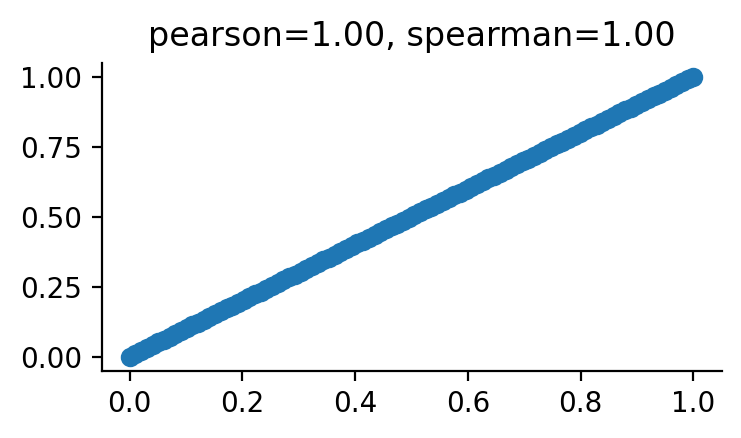

In [55]:
x1 = np.linspace(0, 1, 100)
x2 = x1 #if x2 = x1, they'll be perfectly correlated. Let's check!

p = stats.pearsonr(x1, x2)
s = stats.spearmanr(x1, x2)

fig, ax = plt.subplots(figsize=(4, 2))
ax.scatter(x1, x2)
ax.set_title(f"pearson={p.correlation:.2f}, spearman={s.correlation:.2f}")
sns.despine()

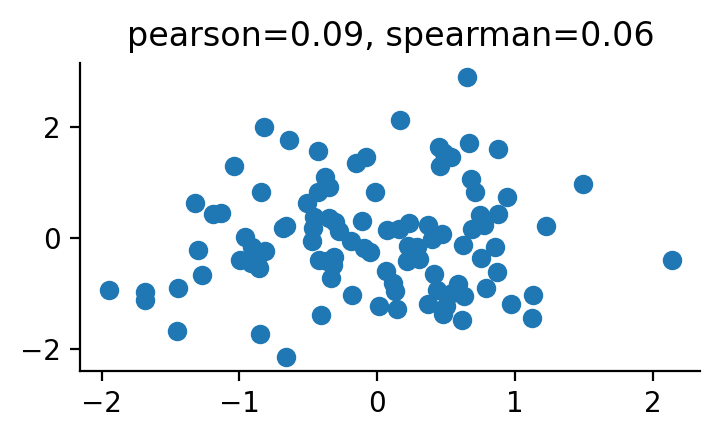

In [56]:
rng = np.random.default_rng(42)

x1 = rng.normal(0, 1, size=100)
x2 = rng.normal(0, 1, size=100)
#Do you expect these to be correlated?

p = stats.pearsonr(x1, x2)
s = stats.spearmanr(x1, x2)

fig, ax = plt.subplots(figsize=(4, 2))
ax.scatter(x1, x2)
ax.set_title(f"pearson={p.correlation:.2f}, spearman={s.correlation:.2f}")
sns.despine()

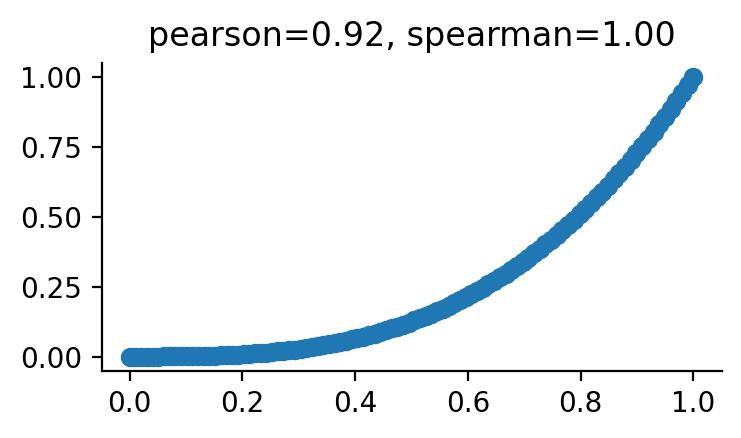

In [57]:
x1 = np.linspace(0, 1, 100)
x2 = x1 ** 3

p = stats.pearsonr(x1, x2)
s = stats.spearmanr(x1, x2)

fig, ax = plt.subplots(figsize=(4, 2))
ax.scatter(x1, x2)
ax.set_title(f"pearson={p.correlation:.2f}, spearman={s.correlation:.2f}")
sns.despine()

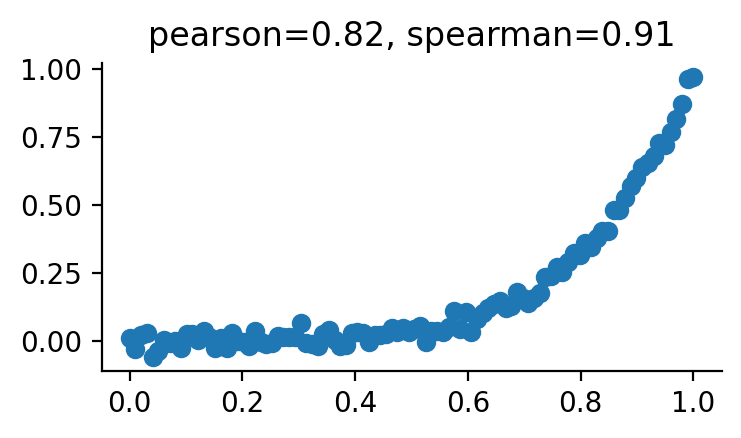

In [58]:
rng = np.random.default_rng(42)

x1 = np.linspace(0, 1, 100)
x2 = (x1 ** 5) + rng.normal(0, 0.03, size=100)

p = stats.pearsonr(x1, x2)
s = stats.spearmanr(x1, x2)

fig, ax = plt.subplots(figsize=(4, 2))
ax.scatter(x1, x2)
ax.set_title(f"pearson={p.correlation:.2f}, spearman={s.correlation:.2f}")
sns.despine()

# Lab

For this next part, we'll use the `waffles` dataset.

* `waffles` is a dataframe of each US state and the number of waffle houses they have, marriage rate, divorce rate, etc.

In [59]:
waffles = pd.read_json(
    StringIO('{"Location":{"0":"Alabama","1":"Alaska","2":"Arizona","3":"Arkansas","4":"California","5":"Colorado","6":"Connecticut","7":"Delaware","8":"District of Columbia","9":"Florida","10":"Georgia","11":"Hawaii","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"Minnesota","24":"Mississippi","25":"Missouri","26":"Montana","27":"Nebraska","28":"New Hampshire","29":"New Jersey","30":"New Mexico","31":"New York","32":"North Carolina","33":"North Dakota","34":"Ohio","35":"Oklahoma","36":"Oregon","37":"Pennsylvania","38":"Rhode Island","39":"South Carolina","40":"South Dakota","41":"Tennessee","42":"Texas","43":"Utah","44":"Vermont","45":"Virginia","46":"Washington","47":"West Virginia","48":"Wisconsin","49":"Wyoming"},"Population":{"0":4.78,"1":0.71,"2":6.33,"3":2.92,"4":37.25,"5":5.03,"6":3.57,"7":0.9,"8":0.6,"9":18.8,"10":9.69,"11":1.36,"12":1.57,"13":12.83,"14":6.48,"15":3.05,"16":2.85,"17":4.34,"18":4.53,"19":1.33,"20":5.77,"21":6.55,"22":9.88,"23":5.3,"24":2.97,"25":5.99,"26":0.99,"27":1.83,"28":1.32,"29":8.79,"30":2.06,"31":19.38,"32":9.54,"33":0.67,"34":11.54,"35":3.75,"36":3.83,"37":12.7,"38":1.05,"39":4.63,"40":0.81,"41":6.35,"42":25.15,"43":2.76,"44":0.63,"45":8.0,"46":6.72,"47":1.85,"48":5.69,"49":0.56},"MedianAgeMarriage":{"0":25.3,"1":25.2,"2":25.8,"3":24.3,"4":26.8,"5":25.7,"6":27.6,"7":26.6,"8":29.7,"9":26.4,"10":25.9,"11":26.9,"12":23.2,"13":27.0,"14":25.7,"15":25.4,"16":25.0,"17":24.8,"18":25.9,"19":26.4,"20":27.3,"21":28.5,"22":26.4,"23":26.3,"24":25.8,"25":25.6,"26":25.7,"27":25.4,"28":26.8,"29":27.7,"30":25.8,"31":28.4,"32":25.7,"33":25.3,"34":26.3,"35":24.4,"36":26.0,"37":27.1,"38":28.2,"39":26.4,"40":25.6,"41":25.2,"42":25.2,"43":23.3,"44":26.9,"45":26.4,"46":25.9,"47":25.0,"48":26.3,"49":24.2},"Marriage":{"0":20.2,"1":26.0,"2":20.3,"3":26.4,"4":19.1,"5":23.5,"6":17.1,"7":23.1,"8":17.7,"9":17.0,"10":22.1,"11":24.9,"12":25.8,"13":17.9,"14":19.8,"15":21.5,"16":22.1,"17":22.2,"18":20.6,"19":13.5,"20":18.3,"21":15.8,"22":16.5,"23":15.3,"24":19.3,"25":18.6,"26":18.5,"27":19.6,"28":16.7,"29":14.8,"30":20.4,"31":16.8,"32":20.4,"33":26.7,"34":16.9,"35":23.8,"36":18.9,"37":15.5,"38":15.0,"39":18.1,"40":20.1,"41":19.4,"42":21.5,"43":29.6,"44":16.4,"45":20.5,"46":21.4,"47":22.2,"48":17.2,"49":30.7},"Divorce":{"0":12.7,"1":12.5,"2":10.8,"3":13.5,"4":8.0,"5":11.6,"6":6.7,"7":8.9,"8":6.3,"9":8.5,"10":11.5,"11":8.3,"12":7.7,"13":8.0,"14":11.0,"15":10.2,"16":10.6,"17":12.6,"18":11.0,"19":13.0,"20":8.8,"21":7.8,"22":9.2,"23":7.4,"24":11.1,"25":9.5,"26":9.1,"27":8.8,"28":10.1,"29":6.1,"30":10.2,"31":6.6,"32":9.9,"33":8.0,"34":9.5,"35":12.8,"36":10.4,"37":7.7,"38":9.4,"39":8.1,"40":10.9,"41":11.4,"42":10.0,"43":10.2,"44":9.6,"45":8.9,"46":10.0,"47":10.9,"48":8.3,"49":10.3},"WaffleHouses":{"0":128,"1":0,"2":18,"3":41,"4":0,"5":11,"6":0,"7":3,"8":0,"9":133,"10":381,"11":0,"12":0,"13":2,"14":17,"15":0,"16":6,"17":64,"18":66,"19":0,"20":11,"21":0,"22":0,"23":0,"24":72,"25":39,"26":0,"27":0,"28":0,"29":0,"30":2,"31":0,"32":142,"33":0,"34":64,"35":16,"36":0,"37":11,"38":0,"39":144,"40":0,"41":103,"42":99,"43":0,"44":0,"45":40,"46":0,"47":4,"48":0,"49":0}}')
)

waffles.head()

,Location,Population,MedianAgeMarriage,Marriage,Divorce,WaffleHouses
0,Alabama,4.78,25.3,20.2,12.7,128
1,Alaska,0.71,25.2,26.0,12.5,0
2,Arizona,6.33,25.8,20.3,10.8,18
3,Arkansas,2.92,24.3,26.4,13.5,41
4,California,37.25,26.8,19.1,8.0,0


Some specific information on our variables:
* `population` is population in millions
* `WaffleHouses` number of Waffle Houses in the state
* `Marriage` and `Divorce` are rates per 1000 people

Use what you know to attempt to answer the following question:

Do more Waffle Houses lead to more divorces? Or is it just a coincidence?

Use different regressions, correlations, and visualizations to answer this question. We'll all discuss together.

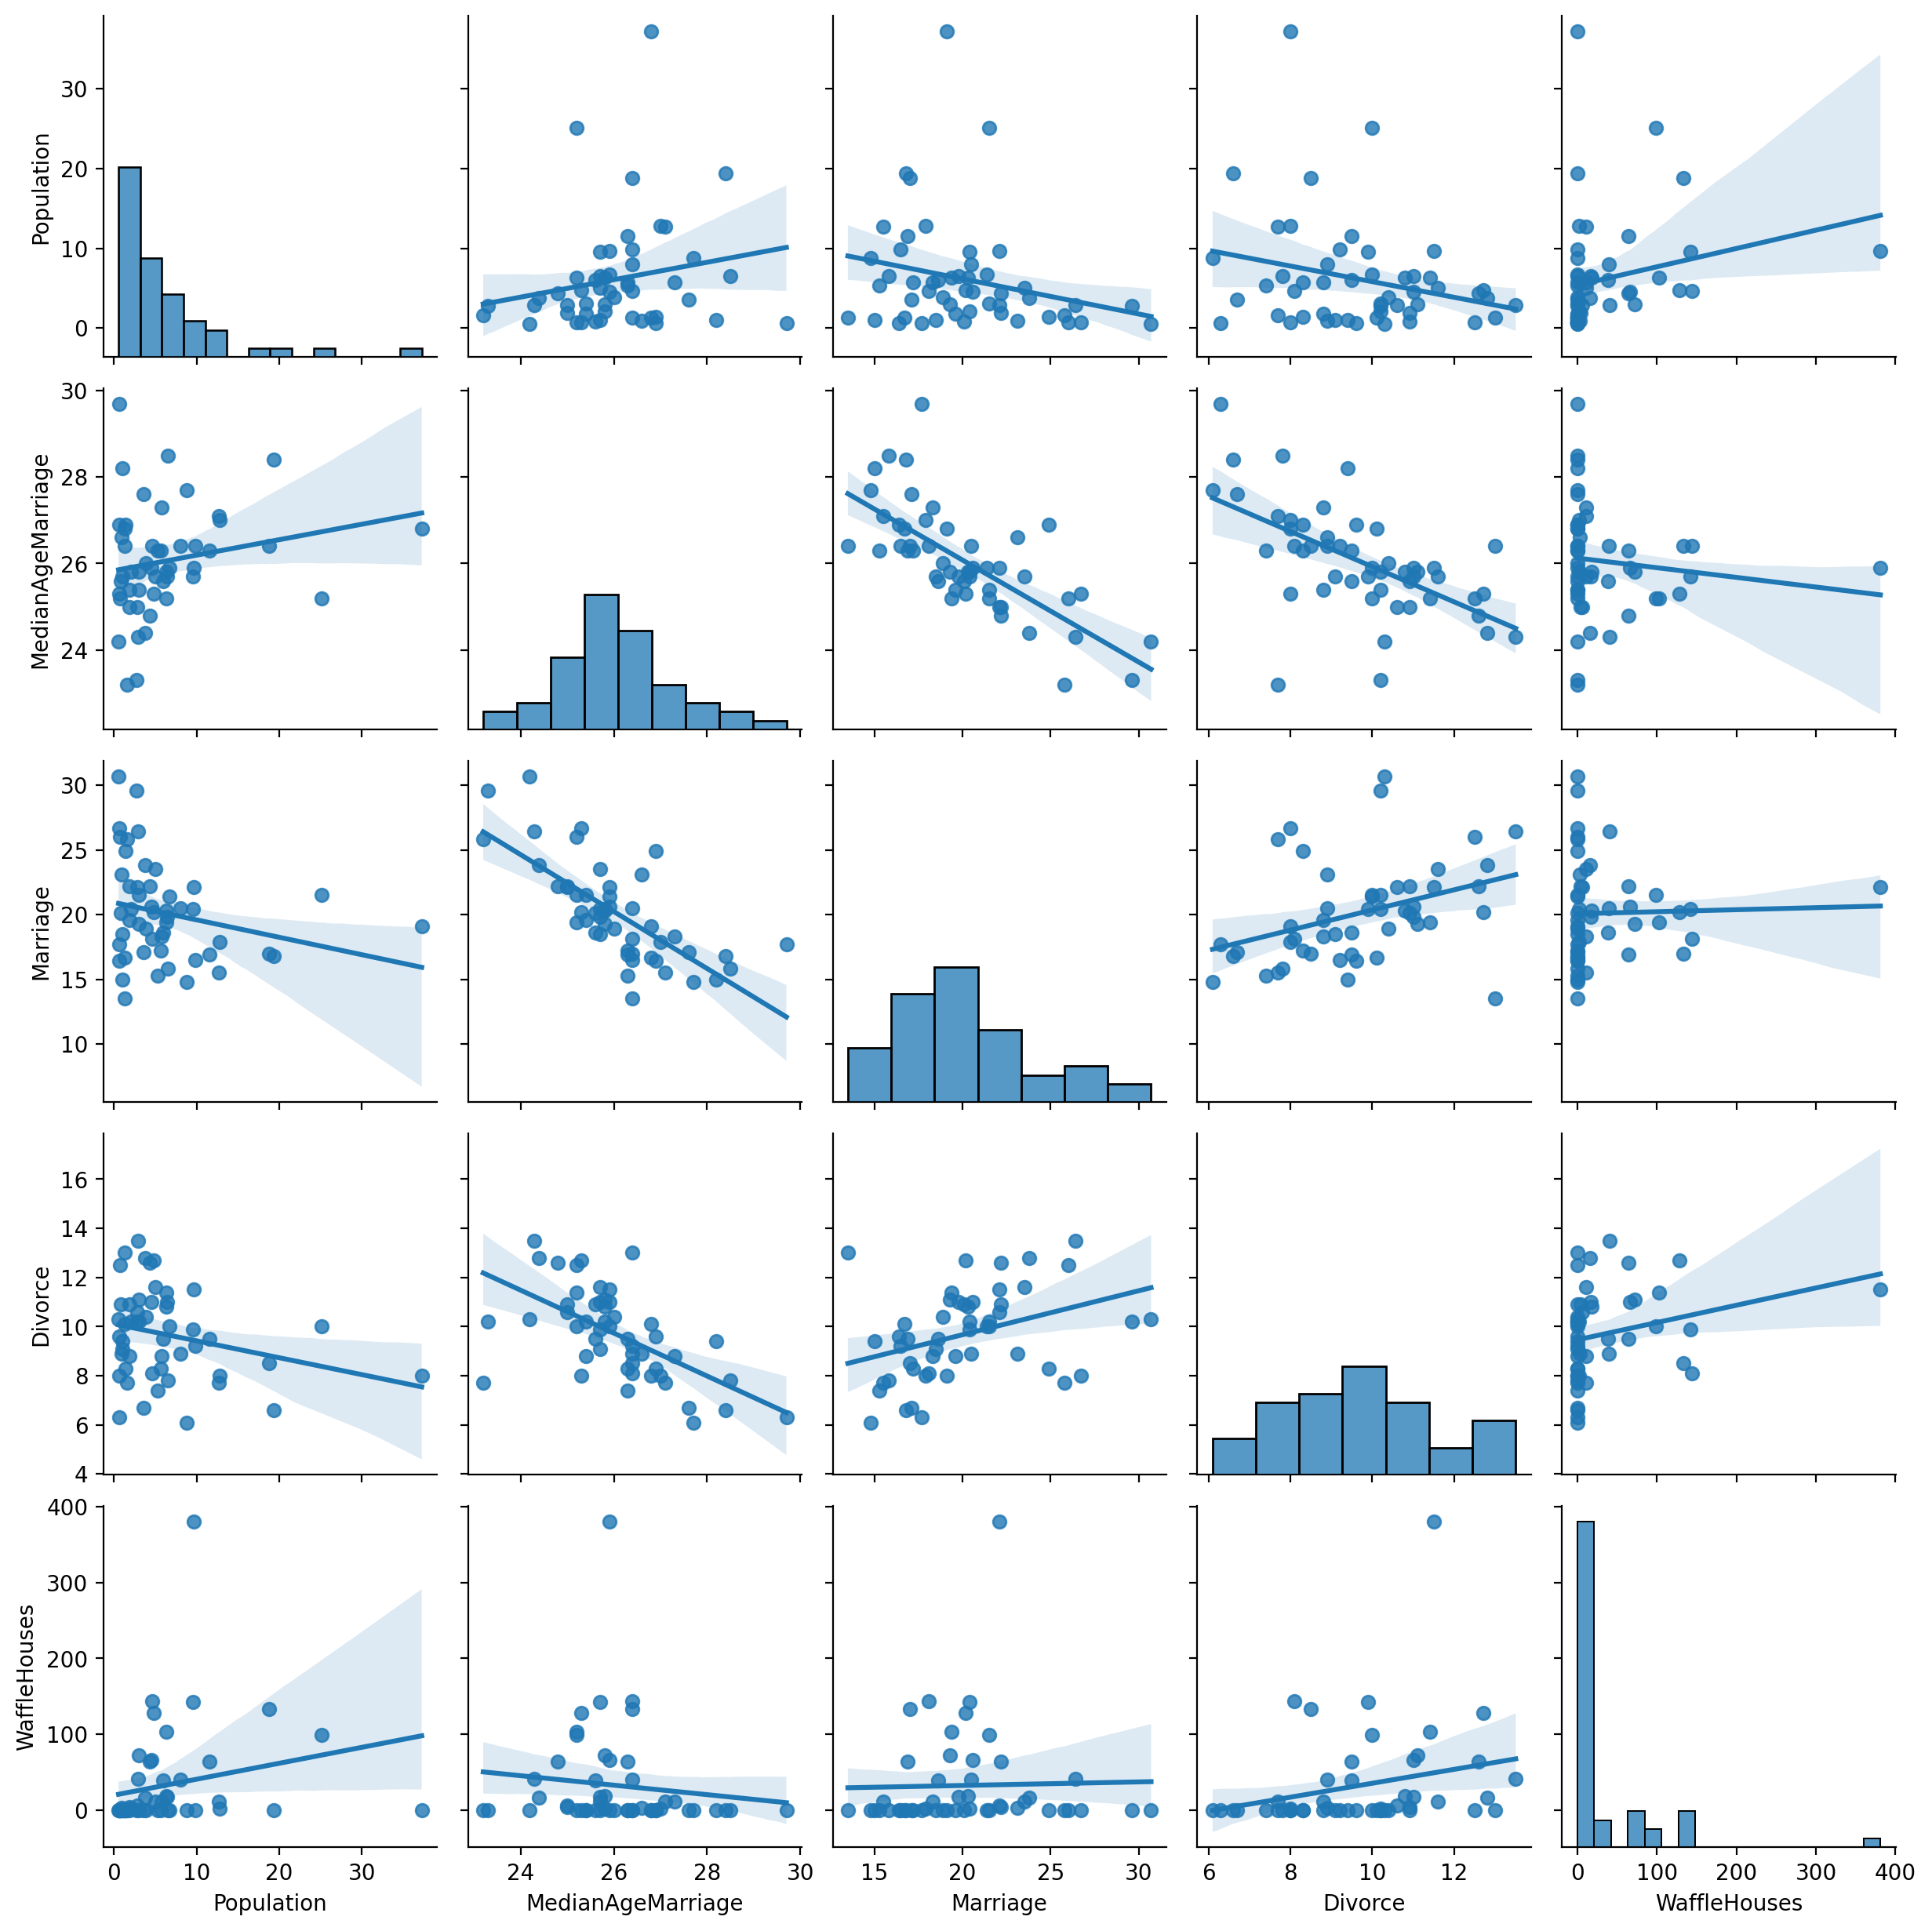

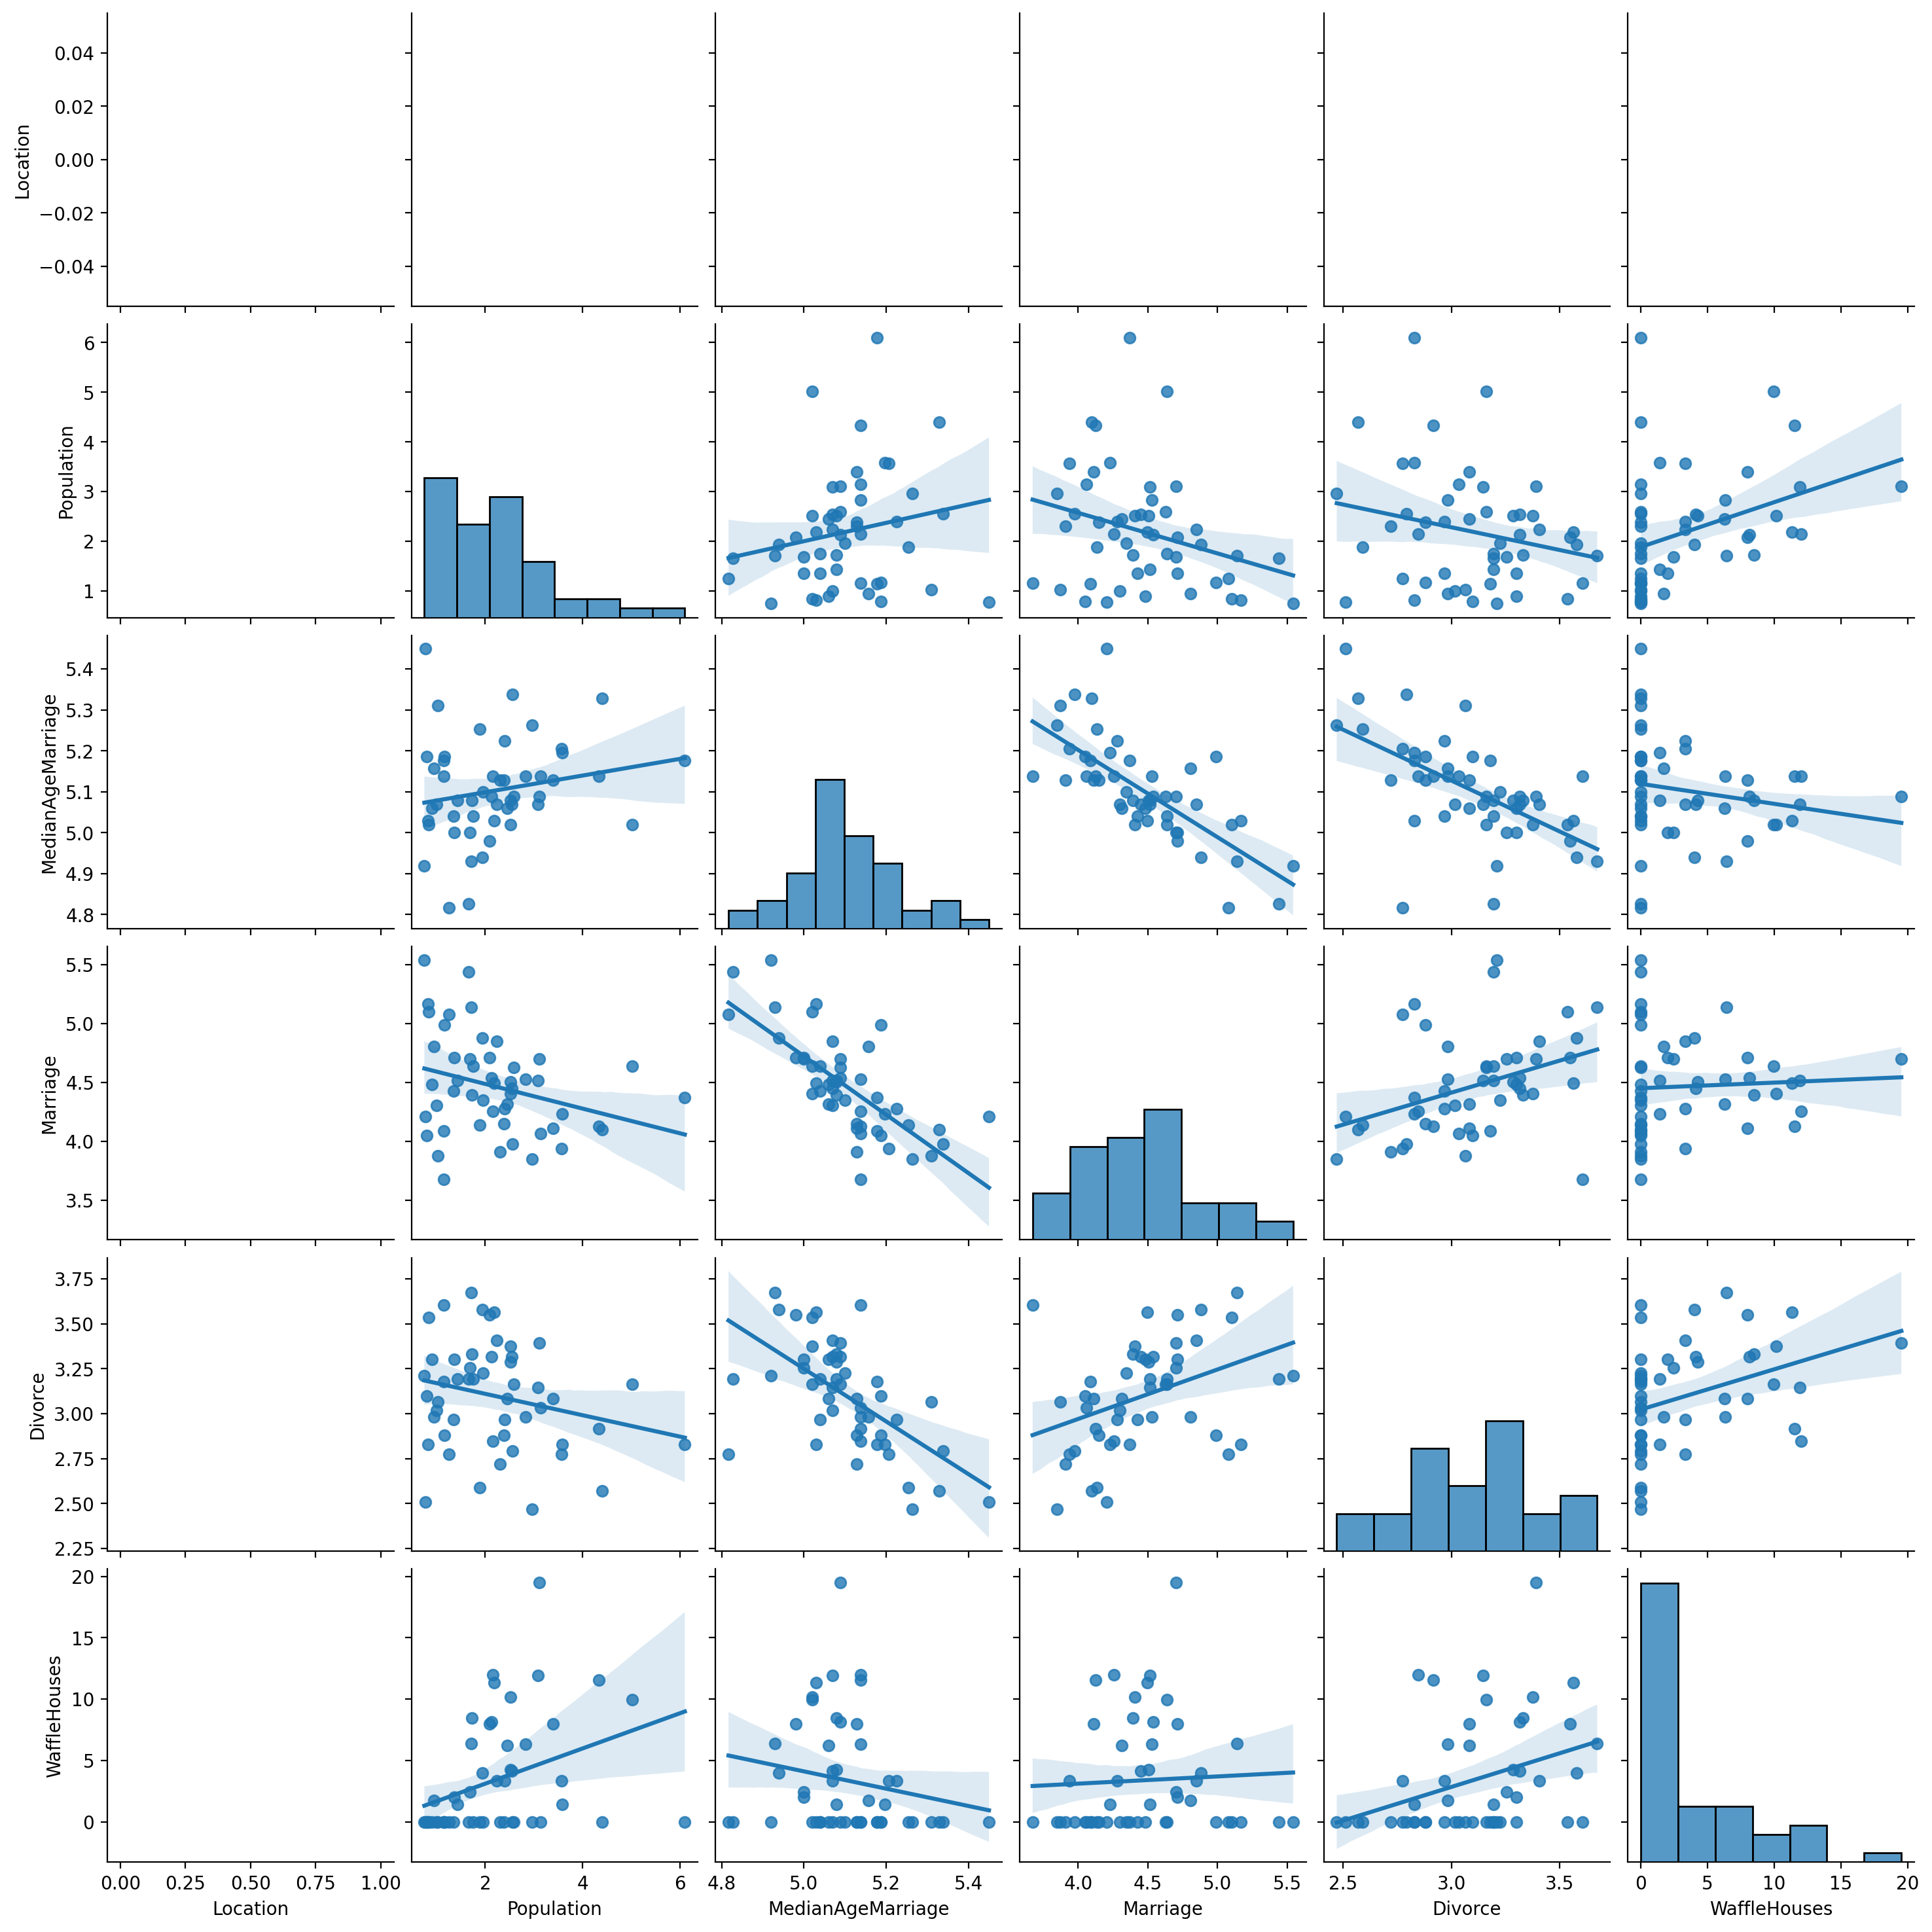

In [60]:
# Look at matrix of variables against each other
sns.pairplot(waffles, kind='reg')
# Add a small constant to avoid taking the log of 0
waffles = waffles.apply(pd.to_numeric, errors='coerce') + 1e-7
# Apply log transformation to all columns
waffles_sqrt = np.sqrt(waffles)
# View matrix after log transformation
sns.pairplot(waffles_sqrt, kind='reg')

In [61]:
# Define variables for MLR
X = waffles_sqrt[['WaffleHouses', 'Population', 'MedianAgeMarriage', 'Marriage']]
y = waffles_sqrt['Divorce']
# Create and fit the MLR model with coefficients
reg_mlr = linear_model.LinearRegression().fit(X, y)
print("Coefficients:", reg_mlr.coef_) #coefficients
print("Intercept:", reg_mlr.intercept_) #intercept
# View Pearson's correlation values for each
correlation_matrix = waffles_sqrt.corr(method='spearman')
print(correlation_matrix)
# Create and fit the Elastic Net model with coefficients
reg_net = linear_model.ElasticNet(alpha=.5, l1_ratio=0.5).fit(X, y)
print(reg_net.coef_)
print("Coefficients:", reg_net.coef_) #coefficients
print("Intercept:", reg_net.intercept_) #intercept
# Looks like population, median marriage age, and marriage % were removed from the Elastic model
# From this small analysis, it does appear that there is a minor positive correlation, if there are more waffle houses in a state, there will also be more divorces. However, correlation does not imply causation.

Coefficients: [ 0.02252275 -0.07333485 -1.42122418 -0.10109612]
Intercept: 10.88721643606545
                   Location  Population  MedianAgeMarriage  Marriage  \
Location                NaN         NaN                NaN       NaN   
Population              NaN    1.000000           0.247849 -0.300917   
MedianAgeMarriage       NaN    0.247849           1.000000 -0.750445   
Marriage                NaN   -0.300917          -0.750445  1.000000   
Divorce                 NaN   -0.195081          -0.621182  0.456546   
WaffleHouses            NaN    0.436995          -0.238510  0.180422   

                    Divorce  WaffleHouses  
Location                NaN           NaN  
Population        -0.195081      0.436995  
MedianAgeMarriage -0.621182     -0.238510  
Marriage           0.456546      0.180422  
Divorce            1.000000      0.397540  
WaffleHouses       0.397540      1.000000  
[ 0.01027813 -0.         -0.          0.        ]
Coefficients: [ 0.01027813 -0.         -0.  